In [3]:
import ROOT 
from ROOT import gStyle
import numpy as np
import ctypes
import array
import os
from IPython.display import display 
import pandas as pd 

samples=os.listdir("SR_OS")
print(samples)
if "MJ.root" in samples:
    os.system("rm SR_OS/MJ.root")

def biner(o_bin,m_bin,f_bin,f_step,l_step):
    a=np.arange(o_bin,m_bin,f_step)
    b=np.arange(m_bin,f_bin+l_step,l_step)
    return np.concatenate((a,b))

def normalization(hist_list):
    for hist in hist_list:
        for i in range(0,len(rebining)):
            value=hist.GetBinContent(i)
            error=hist.GetBinError(i)
            sf=hist.GetBinWidth(i)/5.0    
            hist.SetBinContent(i,value/sf)
            hist.SetBinError(i,error/sf)  

['Zjet.root', 'Wjets.root', 'singletop.root', 'Signal_Sherpa.root', 'Signal_PoPy.root', 'ttbar.root', 'Data.root', 'BG.root', 'VV.root', 'MC.root']


 FCN=122.655 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=4.52105e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.10175e+02   2.45814e+01   1.00430e-01  -1.24670e-06
   2  Mean         9.19803e+01   2.39917e-01   1.26691e-03  -3.89449e-04
   3  Sigma        1.14484e+01   2.03774e-01   2.00970e-05   3.90344e-03


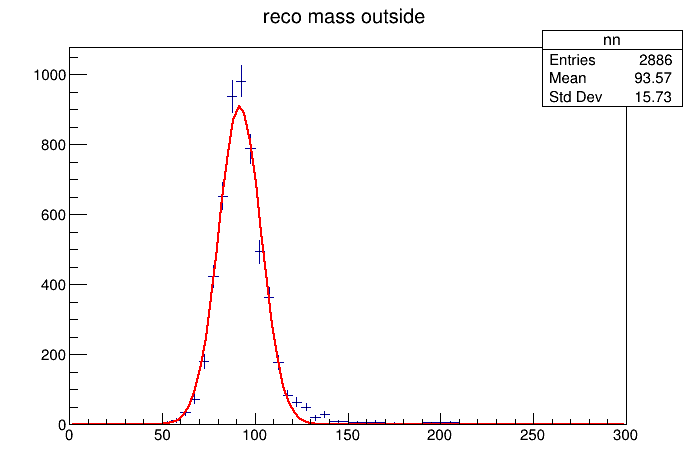

In [20]:
f=ROOT.TFile.Open("SR_OS/Signal_PoPy.root","READ")
histo=f.Get("reco_mass_met_outside_topo_dphi_btag_iso_rnn_ptmu_omega_tpt")
histo.SetDirectory(0)
f.Close()

rebining=biner(0,140,300.0,5,10)
nb=len(binning)-1
histo=histo.Rebin(nb,"nn",rebining)
normalization([histo])
fit=histo.Fit("gaus")


c = ROOT.TCanvas()
histo.Draw()
c.Draw()

In [1]:
def main():
 
    try:
        import ROOT
    except:
        print("It seems that pyROOT isn't properly configured")
        return
 
    """
    Create a HistFactory measurement from python
    """
 
    InputFile = "SR_OS/Data.root"
 
    # Create the measurement
    meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
 
    meas.SetOutputFilePrefix( "./results/example_UsingPy" )
    meas.SetPOI( "a" )
    meas.SetPOI( "b" )
    #meas.AddConstantParam("Lumi")
    #meas.AddConstantParam("alpha_syst1")
 
    meas.SetLumi( 1.0 )
    #meas.SetLumiRelErr( 0.10 )
    #meas.SetExportOnly( False )
 
    # Create a channel
 
    chan = ROOT.RooStats.HistFactory.Channel( "channel1" )
    chan.SetData( "reco_mass_met_outside_topo_dphi_btag_iso_rnn_ptmu_omega_tpt", InputFile )
    chan.SetStatErrorConfig( 0.05, "Poisson" )
 
    # Now, create some samples
 
    # Create the signal sample
    signal = ROOT.RooStats.HistFactory.Sample( "signal", "reco_mass_met_outside_topo_dphi_btag_iso_rnn_ptmu_omega_tpt", "SR_OS/Signal_PoPy.root" )
    #signal.AddOverallSys( "syst1",  0.95, 1.05 )
    #signal.AddNormFactor( "a", 1, 0, 3 )
    chan.AddSample( signal )
 
 
    # Background 1
    background1 = ROOT.RooStats.HistFactory.Sample( "background1", "reco_mass_met_outside_topo_dphi_btag_iso_rnn_ptmu_omega_tpt", "SR_OS/VV.root")
    #background1.ActivateStatError( "background1_statUncert", InputFile )
    #background1.AddOverallSys( "b", 0.95, 1.05  )
    chan.AddSample( background1 )
 
 
    # Background 1
    #background2 = ROOT.RooStats.HistFactory.Sample( "background2", "background2", InputFile )
    #background2.ActivateStatError()
    #background2.AddOverallSys( "syst3", 0.95, 1.05  )
    #chan.AddSample( background2 )
 
 
    # Done with this channel
    # Add it to the measurement:
 
    meas.AddChannel( chan )
 
    # Collect the histograms from their files,
    # print some output, 
    meas.CollectHistograms()
    meas.PrintTree();
 
    # One can print XML code to an
    # output directory:
    # meas.PrintXML( "xmlFromCCode", meas.GetOutputFilePrefix() );
 
    meas.PrintXML( "xmlFromPy", meas.GetOutputFilePrefix() );
 
    # Now, do the measurement
    ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast( meas );
 
    pass
 
 
if __name__ == "__main__":
    main()

Welcome to JupyROOT 6.22/00
